In [ ]:
'''
MNIST
dataset which is a very popular dataset of handwritten digits, and it is a supervised
problem in which you are given the images of the numbers and the correct label
associated with them. You have to build a model that can identify which digit is it
when provided only with the image.

This dataset can easily be converted to an unsupervised setting for basic
visualization. '''

In [ ]:
#https://drive.google.com/file/d/15cZc02ojajv7clv5NwvLoWt5P8ivAwSg/view?usp=sharing

![picture](https://drive.google.com/uc?export=view&id=15cZc02ojajv7clv5NwvLoWt5P8ivAwSg)

In [ ]:
If we do a t-Distributed Stochastic Neighbour Embedding (t-SNE) decomposition
of this dataset, we can see that we can separate the images to some extent just by
doing with two components on the image pixels.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

'''We use matplotlib and seaborn for plotting, numpy to handle the numerical arrays,
pandas to create dataframes from the numerical arrays and scikit-learn (sklearn) to
get the data and perform machine learning algo / t-SNE.'''

'We use matplotlib and seaborn for plotting, numpy to handle the numerical arrays,\npandas to create dataframes from the numerical arrays and scikit-learn (sklearn) to\nget the data and perform t-SNE.'

In [ ]:
'''
we need to either download the data and read it separately or use
sklearn’s built-in function that provides us with the MNIST dataset.'''
data=datasets.fetch_openml('mnist_784',
                           version=1,
                           return_X_y=True)
pixel_values,targets=data
targets=targets.astype(int)
'''
we have fetched the data using sklearn datasets, and we
have an array of pixel values and another array of targets. Since the targets are of
string type, we convert them to integers.
pixel_values is a 2-dimensional array of shape 70000x784. 
There are 70000 different images, each of size 28x28 pixels. Flattening 28x28 gives 784 data points.'''



'\nwe have fetched the data using sklearn datasets, and we\nhave an array of pixel values and another array of targets. Since the targets are of\nstring type, we convert them to integers.\npixel_values is a 2-dimensional array of shape 70000x784. There are 70000\ndifferent images, each of size 28x28 pixels. Flattening 28x28 gives 784 data points.'

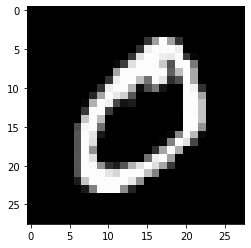

In [ ]:
single_image=pixel_values.iloc[1,:].values.reshape(28,28)
plt.imshow(single_image,cmap='gray')
''' AT index number 1 zero image is present '''

In [ ]:
tsne=manifold.TSNE(n_components=2,random_state=42)#object of tsne algo.
transformed_data=tsne.fit_transform(pixel_values.iloc[:3000,:]) #fitting & learning

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
'''This step creates the t-SNE transformation of the data. We use only two components
as we can visualize them well in a two-dimensional setting. The transformed_data,
in this case, is an array of shape 3000x2 (3000 rows and 2 columns). A data like
this can be converted to a pandas dataframe by calling pd.DataFrame on the array.'''

In [ ]:
tsne_df=pd.DataFrame(
    np.column_stack((transformed_data,targets[:3000])),
    columns=['X','Y','targets']
)
tsne_df.loc[:,'targets']=tsne_df.targets.astype(int)
'''
Here we are creating a pandas dataframe from a numpy array. There are three
columns: x, y and targets. x and y are the two components from t-SNE
decomposition and targets is the actual number. '''

'\nHere we are creating a pandas dataframe from a numpy array. There are three\ncolumns: x, y and targets. x and y are the two components from t-SNE\ndecomposition and targets is the actual number. '

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


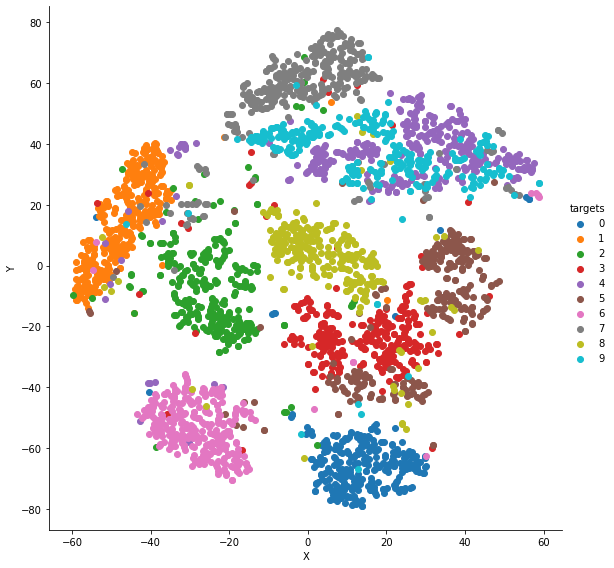

In [ ]:
grid=sns.FacetGrid(tsne_df,hue='targets',size=8)
grid.map(plt.scatter,'X','Y').add_legend()

In [ ]:
'''
This is one way of visualizing unsupervised datasets. We can also do k-means
clustering on the same dataset and see how it performs in an unsupervised setting.
One question that arises all the time is how to find the optimal number of clusters
in k-means clustering. Well, there is no right answer. You have to find the number
by cross-validation.'''